<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select
                count(id)   /* Считаем количество вакансий по индивидуальным id */
                from public.vacancies
'''

In [5]:
# результат запроса
vacancies_count = pd.read_sql_query(query_3_1, connection)
vacancies_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\3467169053.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_count = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select
                   count(id)   /* Считаем количество работодателей по индивидуальным id */
                from public.employers
'''                   

In [7]:
# результат запроса
employers_count = pd.read_sql_query(query_3_2, connection)
employers_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\133946897.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_count = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select
                   count(id)   /* Считаем количество регионов по индивидуальным id */
                from public.areas
'''                   

In [9]:
# результат запроса
areas_count = pd.read_sql_query(query_3_3, connection)
areas_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\3417668578.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_count = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''select 
                   count(id)   /* Считаем количество сфер деятельности по индивидуальным id */
                from public.industries
'''                   

In [11]:
# результат запроса
industries_count = pd.read_sql_query(query_3_4, connection)
industries_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1238563480.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries_count = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [12]:
# выводы по предварительному анализу данных

**Выводы:**
Наблюдается растущая необходимость и популярность в специалистах из IT-областей. Об этом свидетельствует:
* 1. Количество вакансий более чем в два раза превышает количество работодателей. Значит у некоторых работодателей
     имеется несколько открытых вакансий на специалистов.
* 2. Большое количество регионов, в которые требуются IT-специалисты. Это говорит о широкой географической востребованности в этой области.
* 3. Почти 300 сфер областей нуждаются в IT-специалистах.     

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''select 
                   a.name area,   /* Выводим столбец таблицы а с алиасом area */
                   count(v.id) cnt   /* Выводим толбец с количетвом вакансий для каждого региона с алиасом cnt */
                from public.areas a   /* Начальнй таблице areas присваеваем алиас а */
                join public.vacancies v on a.id = v.area_id  /* Присоединяем таблицу вакансий с алиасом v по id регионов */
                group by area   /* Группируем по регионам */
                order by cnt desc   /* Упорядочеваем по каличеству вакансий в порядке убывания */
'''                   

In [14]:
# результат запроса
cnt_by_area = pd.read_sql_query(query_4_1, connection)
cnt_by_area

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\2312453855.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_by_area = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''select 
                   count(id) cnt   /* Считаем кол-во вакансий по id, присваиваем алиас cnt */
                from public.vacancies 
                   /* Добавляем условия, что хотябы один столбец с указанной зп не является пустым */
                where salary_from is not null or salary_to is not null
'''                   

In [16]:
# результат запроса
filled_salary = pd.read_sql_query(query_4_2, connection)
filled_salary

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\3238036412.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  filled_salary = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''select
                   round(avg(salary_from),0) avg_from,   /* Находим среднее значение начальной зп, алиас avg_from */
                   round(avg(salary_to),0) avg_to   /* Находим среднее значение предельного значения зп, алиас avg_to */
                from public.vacancies 
'''                   

In [18]:
# результат запроса
avg_salary = pd.read_sql_query(query_4_3, connection)
avg_salary

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\212845365.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''select
                   schedule,   /* Выводи столбец с типом рабочего графика */
                   employment,   /* Выводим столбец с типом трудоустройства */
                   count(id)   /* Столбец с количеством вакансий для каждого сочетания первых двух столцов */
                from public.vacancies 
                group by 1, 2   /* Группируем по столбцам schedule, employment */
                order by 3 desc   /* Сортируем по кол-ву вакансий в порядке убывания */
'''

In [20]:
# результат запроса
schedule_employment_cnt = pd.read_sql_query(query_4_4, connection)
schedule_employment_cnt

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\558831535.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_employment_cnt = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''select
                   experience,   /* Выводим столбец с требуемым опытом работы */
                   count(id)   /* Считаем количетво вакансий для каждого значения опыта работы */
                from public.vacancies
                group by 1   /* Группируем по столбцу experience */
                order by 2   /* Сортируем по кол-ву вакансий в порядке возрастания */
'''

In [22]:
# результат запроса
experience_count = pd.read_sql_query(query_4_5, connection)
experience_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1998695830.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience_count = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

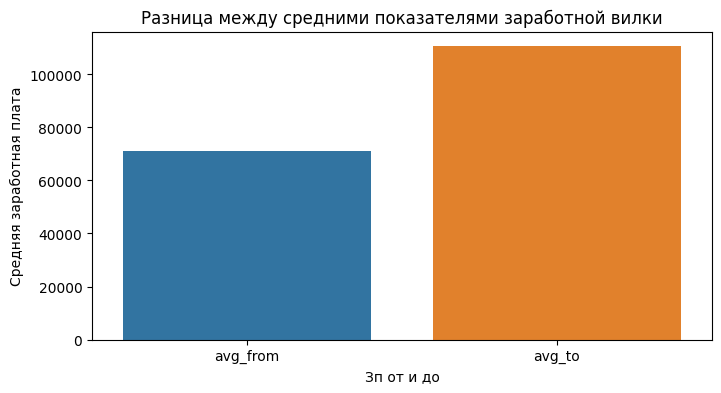

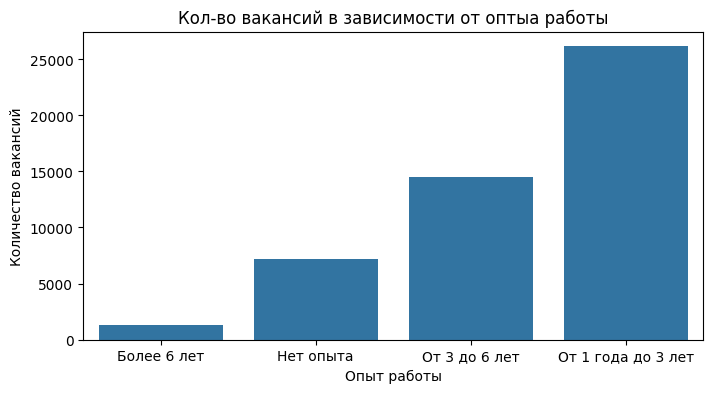

In [23]:
# выводы по детальному анализу вакансий

# График, демонстрирующий средние показатели зарплатной вилки
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(avg_salary, ax=ax)
ax.set_title('Разница между средними показателями заработной вилки');
ax.set_xlabel('Зп от и до');
ax.set_ylabel('Средняя заработная плата');

# График, демонстрирующий количество вакансий в зависимости от опыта работы
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(data = experience_count,
                        x= 'experience',
                        y= 'count',
                        ax=ax)
ax.set_title('Кол-во вакансий в зависимости от оптыа работы');
ax.set_xlabel('Опыт работы');
ax.set_ylabel('Количество вакансий');

## Выводы: ##
* 1. Большинство вакансий требуется для крупных и развитых городов, таких как Москва и региональные центры. Большинство крупных развивающихся фирм, нуждающихся в специалистах IT-области имеют в них офисы.
* 2. Около половины вакансий показывают уровень заработной платы. Вероятно для привлечения специалистов.
* 3. Средний показатель максимальной заработной платы для вакансии превышает минимальный показатель в 1.5 раза. Это если не судить о показателях заработной платы в разрезе опыта работы требуемого специалиста. Так уровень заработной платы может различаться в несколько раз.
* 4. Самый популярный тип трудоустройства это "Полная занятость". Самый популярный график работы (в порядке убывания) это "Полный день", "Удаленная работа", "Гибкий график". Это свидельствует о том, что компании ищут себе специалистов на постоянное место работы, что в свою очередь говорит о количестве и востребованности работы для которой необходимы IT-специалисты.
* 5. Набольшое количество работодателей ищет специалистов с опытом работы от 1 до 3 лет. Наименьший показатель имеют вакансии с опытом работы от 6 лет. Это может говорить об относительной "молодости" необходимых IT-профессий и специалисты с большим опытом работы встречаются довольно редко. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''select 
                   e.name employer_name,   /* Выводим столбец с названием работодателя таблицы е, алиас employer_name */
                   count(v.id) vacancie_cnt   /* Выводим столбец с количеством вакансий таблицы v, алиас vacancie_cnt */
                from public.employers e   /* Берем начальную таблицу работодателей, присваиваем алиас е */
                join public.vacancies v on e.id = v.employer_id   /* Присоединяем таблицу вакансий с алиасом v, по id работодателя */
                group by 1   /* Группируем по столбцу employer_name */
                order by 2 desc /* Сортируем по столбцу vacancie_cnt в порядке убывания */
                limit 5   /* Выводим топ-5 работодателей по количеству вакансий */
'''                

In [25]:
# результат запроса
cnt_employers_by_vacancies = pd.read_sql_query(query_5_1, connection)
cnt_employers_by_vacancies

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1079591548.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_employers_by_vacancies = pd.read_sql_query(query_5_1, connection)


,employer_name,vacancie_cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f'''select 
                   a.name area_name,   /* Выводим столбец с названиями регионов таблицы а, алиас area_name */
                   count(e.id) employers_cnt,   /* Выводим столбец с количеством работодателей таблицы е, алиас employers_cnt */
                   count(v.id) vacancies_cnt   /* Выводим столбец с количеством вакансий таблицы v, алиас vacancies_cnt */
                from public.areas a   /* Берем основную таблицы регионов с алиасом а */
                left join public.employers e on e.area = a.id   /* Присоединяем таблицу с работодателями, алиас е, по id регионов */
                left join public.vacancies v  on v.area_id = a.id   /* Присоединяем таблицу с вакансиями, алиас v, по id регионов */
                group by area_name   /* Группируем по столбцу с названиями регионов */
                order by 3, 2   /* Сортируем по столбцам employers_cnt, vacancies_cnt в порядке возростания значений */
'''

In [27]:
# результат запроса
count_for_areas = pd.read_sql_query(query_5_2, connection)
count_for_areas

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\419001086.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_for_areas = pd.read_sql_query(query_5_2, connection)


,area_name,employers_cnt,vacancies_cnt
0,Котельниково,0,0
1,Скидель,0,0
2,Бакал,0,0
3,Большой Исток,0,0
4,Львовское,0,0
...,...,...,...
1357,Новосибирск,1149438,1149438
1358,Алматы,1364132,1364132
1359,Минск,2354880,2354880
1360,Санкт-Петербург,6320667,6320667


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''select
                   count(distinct v.area_id) area_cnt,  /* Выводим столбец с количеством уникальных id регионов таблицы v, алиас area_cnt */
                   e.name employer_name   /* Выводим столбец с названием работодателя таблицы е, алиас employer_name */
                from vacancies v  /* Берем основную таблицу вакансий с аласом v */
                left join employers e on v.employer_id=e.id   /* Присоединяем таблицу работодателей с алиасом е по id работодателя */
                group by e.id   /* Группируем по id работодателя */
                order by 1 desc   /* Сортируем по столбцу area_cnt в порядке убывания */
''' 

In [29]:
# результат запроса
employer_cnt_areas = pd.read_sql_query(query_5_3, connection)
employer_cnt_areas

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\526183072.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employer_cnt_areas = pd.read_sql_query(query_5_3, connection)


,area_cnt,employer_name
0,181,Яндекс
1,152,Ростелеком
2,116,Спецремонт
3,88,Поляков Денис Иванович
4,71,ООО ЕФИН
...,...,...
14901,1,НПП Авиатрон
14902,1,Центр дистанционных торгов
14903,1,Городские Телекоммуникационные Системы
14904,1,"Введенский, Отель"


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''select
                   count(*)   /* Выводим столбец с количеством полученных значений */
                from employers e   /* Берем основную таблицу работодателей с алиасом е */
                left join employers_industries ei on e.id = ei.employer_id   /* Присоединяем таблицу с id сфер деятельности, алиас ei, по id работодателя */
                where ei.industry_id is null   /* Задаем условие где id сферы деятельности имеет пустое значение */
'''

In [31]:
# результат запроса
industrys_null = pd.read_sql_query(query_5_4, connection)
industrys_null

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\2389689893.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industrys_null = pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
query_5_5 = f'''select
                   e.name employer_name,   /* Выводим столбец с названием работодателя таблицы е, алиас employer_name */
                   count(industry_id) industry_cnt   /* Выводим столбец с количеством id сфер деятельности, алиас industry_id */
                from employers e   /* Берем основную таблицу работодателей, алиас е */
                join employers_industries ei on e.id = ei.employer_id   /* Присоединяем таблицу id сфер деятельности, алиас ei, по id работодателя */
                group by 1   /* Группируем по столбцу employer_name */
                having count(industry_id) = 4   /* Задаем условие - кол-во сфер деятельности равно 4 */
                order by 1   /* Сортируем по столбцу employer_name */
                offset 2 limit 1   /* Выводим данные работодателя, находящегося на 3 месте */
'''

In [33]:
# результат запроса
cnt_by_industry = pd.read_sql_query(query_5_5, connection)
cnt_by_industry

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1981004799.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_by_industry = pd.read_sql_query(query_5_5, connection)


,employer_name,industry_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''select
                   count(e.id)   /* Выводим столбец с кол-ом работодателей таблицы е */
                from public.employers e   /* Берем основную таблицу работодателей, алиас е */ 
                join public.employers_industries ei on ei.employer_id = e.id   /* Присоединяем таблицу id сфер деятельности, алиас ei, по id работодателя */
                join public.industries i on i.id = ei.industry_id   /* Присоединяем таблицу сфер деятельности, алиас i, по id сферы деятельности */
                   /* Задаем условие для названия сферы деятельности */
                where i.name like '%Разработка%программного%обеспечения%'
'''

In [35]:
# результат запроса
cnt_employers_by_industries = pd.read_sql_query(query_5_6, connection)
cnt_employers_by_industries

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\208677899.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_employers_by_industries = pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
cities = (str(page.find('table', class_='standard')))
cities = cities.split('title="')[3:]
million_cities = []
for i in cities:
    million_cities.append(i.split('">')[0])
million_cities = tuple(million_cities)
print(million_cities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [37]:
# текст запроса
query_5_7 = f'''
                select
                   a.name,   /* Выводим столбец с названиями регионов таблицы а */
                   count(v.id) cnt   /* Выводим столбец с количеством вакансий */
                from public.vacancies v   /* Берем основную таблицу вакансий, алиас v */
                join public.areas a on a.id = v.area_id   /* Присоединяем таблицу с регионами, алиас а, по id региона */
                join public.employers e on e.id = v.employer_id   /* Присоединяем таблицу работодателей, алиас е, по id работодателя */
                where e.name = 'Яндекс' /* Задаем условие для названия работодателя */
                group by 1   /* Группируем по столбцу с названием региона */
                having a.name in {million_cities}   /* Задаем условие что название региона есть в списке городов-миллионников */
                union   /* Обьединяем таблицы */
                select 
                   'total',   /* Создаем столбец с названием total */
                   count(distinct v.id)   /* Столбец с кол-ом уникальных id вакансий */
                from public.vacancies v   /* Берем основную таблицу вакансий, алиас v */
                join public.areas a on a.id = v.area_id   /* Присоединяем таблицу регионов, алиас а, по id региона */
                join public.employers e on e.id = v.employer_id   /* Присоединяем таблицу работодателей, алиас е, по id работодателя */
                   /* Задаем условие что название региона есть в списке городов-миллионников и название работодателя 'Яндекс' */
                where a.name in {million_cities} and e.name = 'Яндекс'
                
                order by 2 desc   /* Сортируем по столбцу с количеством вакансий в порядке убывания */
'''


In [38]:
# результат запроса
yandex_cnt = pd.read_sql_query(query_5_7, connection)
yandex_cnt

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\87562543.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_cnt = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


***

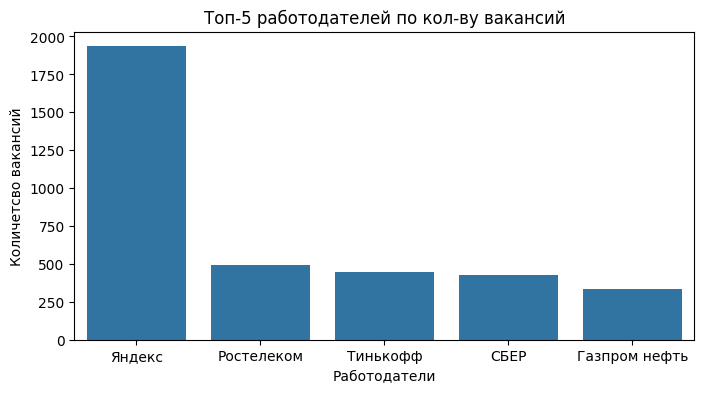

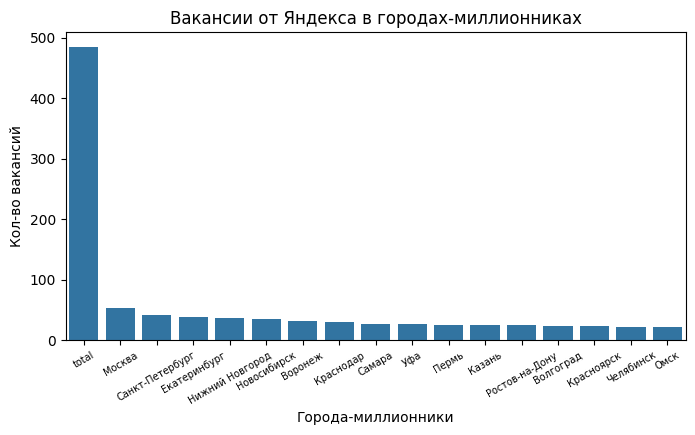

In [39]:
# выводы по анализу работодателей
# График, демонстрирующий Топ-5 работодателей по кол-ву вакансий
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(data = cnt_employers_by_vacancies,
                        x= 'employer_name',
                        y= 'vacancie_cnt',
                        ax=ax)
ax.set_title('Топ-5 работодателей по кол-ву вакансий');
ax.set_xlabel('Работодатели');
ax.set_ylabel('Количетсво вакансий');

# График, демонстрирующий кол-во вакансий от компании Яндекс в городах-миллионниках и общее кол-во вакансий
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(data = yandex_cnt,
                        x= 'name',
                        y= 'cnt',
                        ax=ax)
ax.set_title('Вакансии от Яндекса в городах-миллионниках');
ax.set_xlabel('Города-миллионники');
ax.xaxis.set_tick_params(rotation=30,labelsize=7)
ax.set_ylabel('Кол-во вакансий');

## Выводы: ##
* 1. Топ-5 работодателей в IT-области это Яндекс (крупнейший интернет холдинг в России. Ему требуется наибольшое количество IT-специалистов), Ростелеком (самый распространненый интрнет-провайдер в России), Тинькофф, СБЕР (в банковской среде очень востребованны IT-специалисты),  Газпром нефть (крупнейшая российская нефте-газовая компания также крайне понимает важность IT-области в современном бизнесе).
* 2. Как уже говорилось ранее, наибольшее количество вакансий и работодателей сосредоточены в самых развитых и густонаселенных городах, таких как Москва и областные центры.
* 3. Лидером по кол-ву регионов где размещенны вакансии работодателя, является Яндекс (181 регион). На втором месте Ростелеком (152 региона). На третьем месте Спецремонт - одна из крупнейших компаний России в сфере железнодорожного транспорта и транспортного машиностроения (116 регионов).
* 4. Кол-во работодателей у которых не указана сфера деятельности равняется 8419. Здесь возможны два варианта: 1. Либо сфера деятельности у работодателя слишком большая, и он занимается широким видом услуг. 2. В IT-индустрии есть некая проблема. Вклад в развитие IT-подразделений в наше время является признаком развитости и успеха для многих компаний. В связи с этим некоторые компании также создают IT-отделы, но либо они им не слишком нужны, в виду размера той же компании работодателя, либо они плохо представляют что с ними делать.
* 5. Более 3.5 тысяч работодателей занимаются разработкой программного обеспечения. Это говорит о направлении развития российского рынка в создании собственных IT-продуктов которым нужна поддержка.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
query_6_1 = f'''select 
                   count(*)   /* Выводим количество полученых значений */
                from public.vacancies   /* Берем таблицу с вакансиями */
                   /* Задаем условия для названия вакансии */
                where name like '%data%' 
                   or name like '%данн%' 
                   or name like upper('%data%') 
                   or name like upper('%данн%')
                   or name like '%Data%'
                   or name like '%Данн%'
'''

In [41]:
# результат запроса
data_vacancies = pd.read_sql_query(query_6_1, connection)
data_vacancies

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\2935617630.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vacancies = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
query_6_2 = f'''select 
                   count(*)   /* Выводим количество полученных значений */
                from public.vacancies   /* Берем таблицу вакансий */
                   /* Задаем условия для названия вакансии,
                   для столбца experience,
                   и для столбца schedule */
                where (name ilike '%junior%'
                   or experience = 'Нет опыта'
                   or schedule = 'Стажировка')
                and
                   (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name ilike '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%'
                    and key_skills is not null)
'''

In [43]:
# результат запроса
junior_vacancies = pd.read_sql_query(query_6_2, connection)
junior_vacancies

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\625073081.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  junior_vacancies = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
# текст запроса
query_6_3 = f'''select 
                   count(*)   /* Выводим количество полученных значений */
                from public.vacancies   /* Берем таблицу с вакансиями */
                   /* Задаем условия для названия вакансии
                   и для столбца с ключевыми навыками */
                where (key_skills ilike '%SQL%'
                       or key_skills ilike '%postgres%')
                and
                      (name ilike '%data scientist%'
                       or name ilike '%data science%'
                       or name ilike '%исследователь данных%'
                       or (name ilike '%ML%' and name not ilike '%HTML%')
                       or name ilike '%machine learning%'
                       or name ilike '%машинн%обучен%')
'''

In [45]:
# результат запроса
sql_skill_count = pd.read_sql_query(query_6_3, connection)
sql_skill_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1632630962.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_skill_count = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
# текст запроса
query_6_4 = f'''select 
                   count(*)   /* Выводим количество полученных значений */
                from public.vacancies   /* Берем таблицу с вакансиями */
                   /* Задаем условия для столбца с ключевыми навыками
                   и для названия вакансий */
                where (key_skills ilike '%Python%')
                and
                      (name ilike '%data scientist%'
                       or name ilike '%data science%'
                       or name ilike '%исследователь данных%'
                       or (name ilike '%ML%' and name not ilike '%HTML%')
                       or name ilike '%machine learning%'
                       or name ilike '%машинн%обучен%')
'''

In [47]:
# результат запроса
python_skill_count = pd.read_sql_query(query_6_4, connection)
python_skill_count

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\4081203180.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  python_skill_count = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# текст запроса
query_6_5 = f'''select 
                   /* Вычисляем среднию длину для строки столбца с ключевыми навыками */
                   round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2)
                from public.vacancies   /* Берем таблицу вакансий */
                   /* Задаем условия для названия вакансии
                   и для столбца с ключевыми навыками ( не должен быть пустым) */
                where(
                   name ilike '%data scientist%'
                   or name ilike '%data science%'
                   or name ilike '%исследователь данных%'
                   or name like '%ML%' and name not ilike '%HTML%'
                   or name ilike '%machine learning%'
                   or name ilike '%машинн%обучен%'
                   and key_skills is not null)
'''

In [49]:
# результат запроса
avg_skill_len = pd.read_sql_query(query_6_5, connection)
avg_skill_len

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1420788191.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_skill_len = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
# текст запроса
query_6_6 = f'''select 
                   experience,   /* Выводим столбец опыта работы */
                      /* Вычисляем средний показатель заработной платы */
                   round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) avg_salary
                from public.vacancies   /* Берем таблицу вакансий */
                   /* Задаем условия для столбцов начального порога зп и макисмального порога зп (хотя бы один столбец должен иметь не пустое значение)
                   и для названия вакансии */
                where (salary_from is not null or salary_to is not null)
                and
                      (name ilike '%data scientist%'
                       or name ilike '%data science%'
                       or name ilike '%исследователь данных%'
                       or name like '%ML%' and name not ilike '%HTML%'
                       or name ilike '%machine learning%'
                       or name ilike '%машинн%обучен%')
                group by 1   /* Группируем по столбцу experience */
                order by 2   /* Сортируем по столбцу среднего значения зп в порядке возрастания */
'''

In [51]:
# результат запроса
salary_by_experience = pd.read_sql_query(query_6_6, connection)
salary_by_experience

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\1638597233.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_by_experience = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

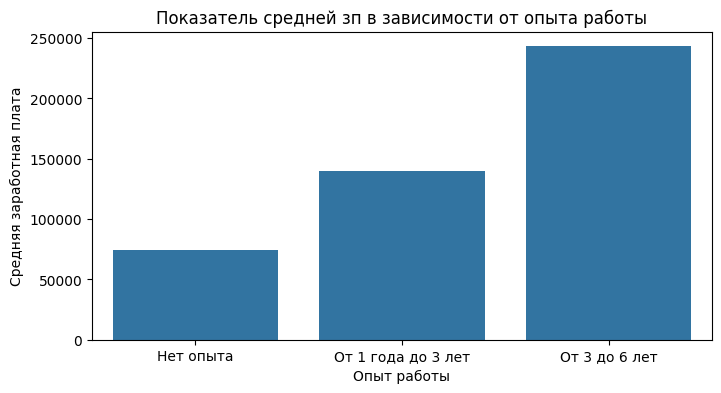

In [52]:
# выводы по предметному анализу
# График, демонстрирующий зависимость средней заработной платы от опыта работы
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(data = salary_by_experience,
                        x= 'experience',
                        y= 'avg_salary',
                        ax=ax)
ax.set_title('Показатель средней зп в зависимости от опыта работы');
ax.set_xlabel('Опыт работы');
ax.set_ylabel('Средняя заработная плата');

## Выводы: ##
* 1. Непосредственно к данным относяться 1771 вакансия. При этом для начинаюших дата-саентистов всего 51 вакансия. Что говорит о том, что работодатели ищут людей имеющих некоторый опыт в данной сфере. В свою очередь это говорит о наличии необходимости опытных специалистов в связи с возросшей надобностью в данной IT-сфере.
* 2. Навыки SQL требуются в 229 вакансиях, а навыки по работе с Python в 357. Но есть вероятность, что так как эти навыки являются едва ли не самыми основными для дата-саентиста, их могут не указывать в обязательном порядке. Тем более что большинство вакансий расчитано на соискателей с опытом работы, то скорее всего нет необходимости включать данные навыки в описание вакансии.
* 3. В среднем в описании вакансии указано больше 6 ключевых навыков. Это говорит и широком профиле возможностей и знаний для опытного дата-саентиста.
* 4. Показатели средней заработной платы естественно растут с опытом работы. Так дата-саентист с опытом работы более 3 лет, претендует на заработную платы в 3 раза выше чем специалист без опыта работы.

# Общий вывод по проекту

In [53]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
# Приведем запрос, показывающий среднюю заработную плату IT-специалистов по городам-миллионникам
query = f'''select
                   a.name area_name,   /* Выводим столбец с названиями регионов таблицы а */
                   round(avg(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) avg_salary /* Считаем средний показатель зп, алиас avg_salary */
                from public.vacancies v   /* Берем основную таблицу вакансий, алиас v */
                join public.areas a on a.id = v.area_id   /* Присоединяем таблицу с регионами, алиас а, по id региона */
                group by 1   /* Группируем по столбцу с названием региона */
                having a.name in {million_cities}   /* Задаем условие что название региона есть в списке городов-миллионников */
                order by 2 desc /* сортируем по столбцу средней зп avg_salary */
'''

In [54]:
# Результат нашего запроса
salary_by_region = pd.read_sql_query(query, connection)
salary_by_region

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\4146400342.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_by_region = pd.read_sql_query(query, connection)


,area_name,avg_salary
0,Москва,134140.0
1,Новосибирск,107777.0
2,Санкт-Петербург,104410.0
3,Нижний Новгород,96059.0
4,Пермь,95985.0
5,Ростов-на-Дону,94065.0
6,Краснодар,92328.0
7,Казань,92207.0
8,Екатеринбург,91896.0
9,Омск,86393.0


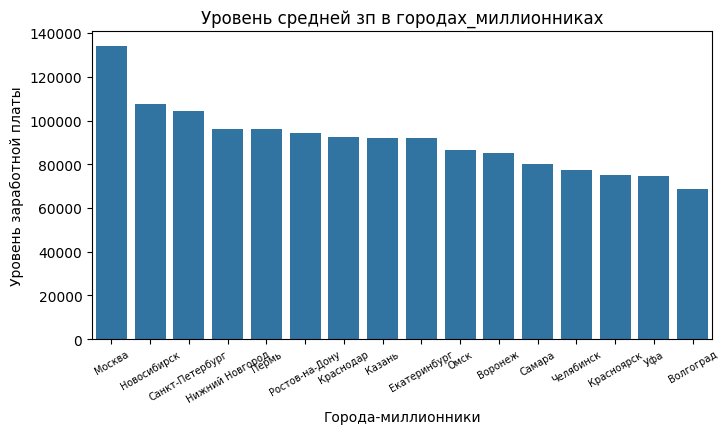

In [55]:
# График, демонстрирующий средний опказатель зп IT-специалиста в городах-миллионниках
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(data = salary_by_region,
                        x= 'area_name',
                        y= 'avg_salary',
                        ax=ax)
ax.set_title('Уровень средней зп в городах_миллионниках');
ax.set_xlabel('Города-миллионники');
ax.xaxis.set_tick_params(rotation=30,labelsize=7)
ax.set_ylabel('Уровень заработной платы');

In [56]:
# Ради интереса попробуем вывести данные по уровню средней зп для дата-саентистов, сгруппированные по работодателям
query_1 = f'''select 
                   e.name employer_name, /* Выводим столбец с названием работодателя таблицы е, алиас employer_name */
                   round(avg(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) avg_salary /* Считаем показатель средней зп, алиас avg_salary */
                from public.vacancies v  /* Берем таблицу с вакансиями, алиас v */
                join public.employers e on e.id = v.employer_id /* Присоединяем таблицу работодателей с алиасом е по id работодателя */
                   /* Задаем условия для названия вакансии */
                where v.name like '%data%' 
                   or v.name like '%данн%' 
                   or v.name like upper('%data%') 
                   or v.name like upper('%данн%')
                   or v.name like '%Data%'
                   or v.name like '%Данн%'
                group by 1 /* Группируем по столбцу с названием работодателя employer_name */
                having round(avg(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) is not null /* Исключаем значения равные 0 */
                order by 2 desc /* Сортируем по столбцу средней зп avg_salary */
'''

In [57]:
# Результат запроса
ds_salary_employers = pd.read_sql_query(query_1, connection)
ds_salary_employers

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_6800\3616963513.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_salary_employers = pd.read_sql_query(query_1, connection)


,employer_name,avg_salary
0,Итон,450000.0
1,Querify Labs,400000.0
2,AppQuantum,350000.0
3,"Hi, Rockits!",310000.0
4,OVISION,300000.0
...,...,...
234,ОГКУ ЦСПН Ленинского района г. Томска,20550.0
235,Мелентов,20024.0
236,My Sky,20000.0
237,Silk Route Trading Ltd,13835.0


## Заключительные выводы: ##
* 1. IT-область находится на стадии активного развития. Множество работодателей заинтересованы в данной области, и находятся в постоянном поиске специалистов для пополнения и расширения штата сотрудников во многих регионах.
* 2. Набольшая сосредоточенность работодателей и вакансий наблюдается в крупных городах. В основном ищут специалистов на постоянное место работы с полной ставкой. Наблюдается сильная градация заработной платы в зависимости от опыта нужного специалиста.
* 3. Большинство вакансий исходят от работодателей тесно связанных с компьютерными интернет технологиями (Яндекс, Ростелеком), так же большая востребованность в области банковских систем и тяжелой промышленности(Газпром, Спецремонт). Многие работодатели занимаются развитием соственных IT-технологий.
* 4. IT-область очень широка. Так DataScience занимает небольшой процент от общего числа вакансий. Это вероятно следствие сложности данной проффесии (в вакансиях по DS указывается большое число необходимых навыков для работы), так и относительной молодости самого направления в сравнении с другими IT-областями. Также в DS наблюдается сильная градация заработной платы в зависимости от опыта специалиста.